# Olusola Insurance Company

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

import pandasql as psql

# pip install pandasql

In [2]:
# Load the universal Olusola Insurance data

Insdata1 = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\41 seasion 14-jul-2021\train_data.csv", header = 0 )
Insdata2 = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\41 seasion 14-jul-2021\test_data.csv", header = 0)
Insdata1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
# Displaying the insurance dataset information

Insdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [4]:
# Count the Target or dependent variable by '0' & '1' and
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Insdata1_count = Insdata1.Claim.value_counts()
print('Class 0: ', Insdata1_count[0])
print('Class 1: ', Insdata1_count[1])
print('Proportion: ', round(Insdata1_count[0] / Insdata1_count[1], 2), ': 1')
print('Total CC Trans: ', len(Insdata1))

Class 0:  5526
Class 1:  1634
Proportion:  3.38 : 1
Total CC Trans:  7160


In [5]:
# Checking is their any Duplicate values

Insdata1_dup = Insdata1[Insdata1.duplicated(keep = 'last')]
Insdata1_dup

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim


In [6]:
Insdata1.shape

(7160, 14)

In [7]:
for i in Insdata1.columns:
    print(Insdata1[i].value_counts())

H4051     1
H5934     1
H19341    1
H15316    1
H4346     1
         ..
H4231     1
H5027     1
H19202    1
H2595     1
H14177    1
Name: Customer Id, Length: 7160, dtype: int64
2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64
1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.268493       1
0.898630       1
0.887978       1
0.830601       1
0.331507       1
Name: Insured_Period, Length: 401, dtype: int64
0    4973
1    2187
Name: Residential, dtype: int64
V    5382
N    1778
Name: Building_Painted, dtype: int64
N    3608
V    3552
Name: Building_Fenced, dtype: int64
O    3602
V    3551
Name: Garden, dtype: int64
R    3610
U    3550
Name: Settlement, dtype: int64
400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
1303.0      1
907.0       1
2445.0      1
924.0       1
4069.0      1
Name: Building Dimension, Length: 2043, dtype: int64
2    3305
1   

In [8]:
# Checking for null values in the train dataset and decide on how to treat them

Insdata1.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [9]:
# Checking for null vallues in the test dataset and decide on how to treat them

Insdata2.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

# Data Preparation and Analysis

In [10]:
# Fill null values for garden, '0' which means no garden is the majority

Insdata1['Garden'].value_counts()

O    3602
V    3551
Name: Garden, dtype: int64

In [11]:
Insdata1['Garden'].fillna('O', inplace=True)
Insdata2['Garden'].fillna("O", inplace=True)

In [12]:
Insdata1['Garden'].value_counts()

O    3609
V    3551
Name: Garden, dtype: int64

In [13]:
Insdata1['Building Dimension'].value_counts()

400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
1303.0      1
907.0       1
2445.0      1
924.0       1
4069.0      1
Name: Building Dimension, Length: 2043, dtype: int64

In [14]:
check1 = Insdata1[['Building Dimension', 'Settlement']]
check1.head()

,Building Dimension,Settlement
0,290.0,U
1,490.0,R
2,595.0,U
3,2840.0,U
4,680.0,R


In [15]:
# Check which settlement type has majority of the null values
# rural has just 1 while urban das 105
# all null values will be filled with the average of rural building dimensions

check1[check1['Settlement'] == "U"]["Building Dimension"].isnull().sum()

105

In [16]:
check1[check1['Settlement'] == 'R']['Building Dimension'].isnull().sum()

1

In [17]:
# average size for buildings in urban areas

Fill_Avg_BD = check1[check1['Settlement'] == "U"]["Building Dimension"].mean()
Fill_Avg_BD

1575.211611030479

In [18]:
# Filling null values for building dimensions

Insdata1['Building Dimension'].fillna(Fill_Avg_BD, inplace=True)
Insdata2['Building Dimension'].fillna(Fill_Avg_BD, inplace=True)

In [19]:
# Quick check

Insdata1['Building Dimension'].isnull().sum()

0

In [20]:
Insdata1['Date_of_Occupancy'].value_counts()

1960.0    1818
1980.0    1155
1988.0     530
1900.0     371
1970.0     285
          ... 
1919.0       1
1780.0       1
1923.0       1
1846.0       1
1545.0       1
Name: Date_of_Occupancy, Length: 134, dtype: int64

In [21]:
#check which settlement type has majority of null values 
#urban has majority with 507 while rural has just 1 
#null values will be filled with the highest occuring date of occupancy from buildings in urban settlement 

Train_Fill_DoO = Insdata1[Insdata1["Settlement"] == "U"]["Date_of_Occupancy"].isnull().sum()
Test_Fill_DoO = Insdata2[Insdata2["Settlement"] == "U"]["Date_of_Occupancy"].isnull().sum()
print(Train_Fill_DoO)
print(Test_Fill_DoO)

507
728


In [22]:
# Highest occuring date of occupancy is 1960

date = Insdata1[Insdata1["Settlement"] == "U"]["Date_of_Occupancy"].value_counts().head()
date

1960.0    1468
1980.0    1010
1988.0     481
1950.0       7
1970.0       6
Name: Date_of_Occupancy, dtype: int64

In [23]:
# Filling null values for date of occupancy

Insdata1["Date_of_Occupancy"].fillna(1960, inplace=True)
Insdata2["Date_of_Occupancy"].fillna(1960, inplace=True)

In [24]:
# Quick check

Insdata1.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [25]:
# Geo_Code 
#only buildings in urban areas have null values 
#this column would be dropped. I do not think it would impact our model 

Insdata1[Insdata1["Settlement"]=="U"]["Geo_Code"].value_counts()

6088     66
21231    63
33063    58
13206    57
6083     56
         ..
83153     1
74011     1
42299     1
42207     1
34037     1
Name: Geo_Code, Length: 832, dtype: int64

In [26]:
# Deleting the 'Geo_Code' variable

Insdata1.drop("Geo_Code", axis =1, inplace=True)
Insdata2.drop("Geo_Code", axis =1, inplace=True)

In [27]:
# the "." here will be treated as null values. 
# and since an overwhelming majority is null, this column will be dropped

Insdata1["NumberOfWindows"].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [28]:
# Delecting the 'NumberOfWindows' variable

Insdata1.drop("NumberOfWindows", axis = 1, inplace=True)
Insdata2.drop("NumberOfWindows", axis = 1, inplace=True)

In [29]:
Insdata1.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Claim                 0
dtype: int64

In [30]:
Insdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 671.4+ KB


In [31]:
# Convert the 'Date_of_Occupancy' from float value to integer value

Insdata1['Date_of_Occupancy'] = Insdata1['Date_of_Occupancy'].astype(int)

In [32]:
# This function splits insured period in 2 groups;
# Over 0.5 will be 1 year policy duration
# Less than 0.5 will be no policy duration

def insured(x):
    if x < 0.5:
        return 0
    else:
        return 1

In [33]:
# Applying the 'insured' function to covert the 'insurance_period' as 0 or 1

Insdata1["Insured_Period"] = Insdata1["Insured_Period"].apply(insured)
Insdata2["Insured_Period"] = Insdata2["Insured_Period"].apply(insured)

In [34]:
Insdata1["Insured_Period"].value_counts()

1    6517
0     643
Name: Insured_Period, dtype: int64

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'No of Claims')

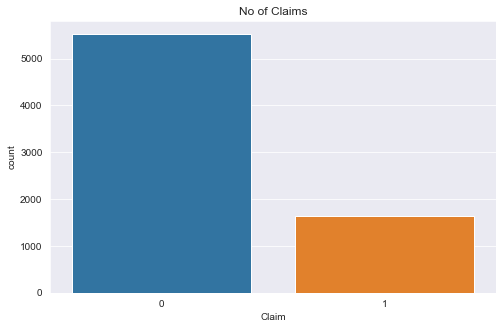

In [35]:
# How many clients have had claims?

plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.countplot(x='Claim', data=Insdata1)

plt.title("No of Claims")

Text(0.5, 1.0, 'Building Type')

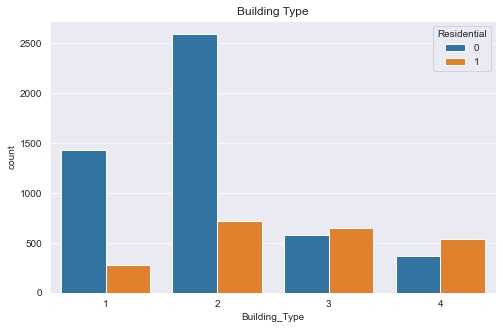

In [36]:
# Distribution of Building Types?

plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.countplot(x = "Building_Type", hue="Residential", data=Insdata1)

plt.title("Building Type")

Text(0.5, 1.0, 'Distribution of Buildings')

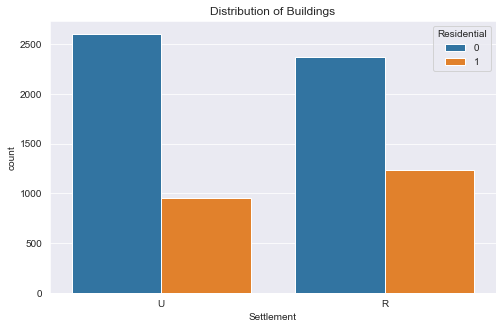

In [37]:
# More (Residential) buildings in Urban areas?

plt.figure(figsize=(8,5))

sns.countplot(x='Settlement', hue='Residential', data=Insdata1)

plt.title("Distribution of Buildings")

In [38]:
# Distribution of Customer by year of Occupancy

year = Insdata1.groupby("Date_of_Occupancy")["Customer Id"].count().to_frame().reset_index()
year.head()

,Date_of_Occupancy,Customer Id
0,1545,1
1,1550,1
2,1600,5
3,1613,1
4,1700,10


<AxesSubplot:xlabel='Date_of_Occupancy'>

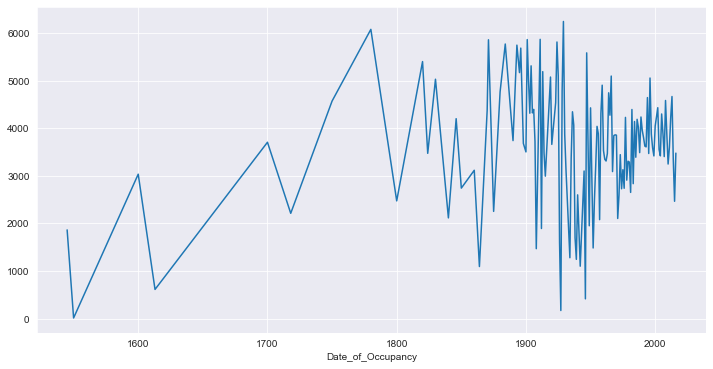

In [39]:
plt.figure(figsize=(12,6))

sns.lineplot(x="Date_of_Occupancy", y = Insdata1.index, data=Insdata1, err_style=None)

# Modelling the Insurance data

In [40]:
Insdata1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,H14663,2013,1,0,N,V,V,U,290.0,1,1960,0
1,H2037,2015,1,0,V,N,O,R,490.0,1,1850,0
2,H3802,2014,1,0,N,V,V,U,595.0,1,1960,0
3,H3834,2013,1,0,V,V,V,U,2840.0,1,1960,0
4,H5053,2014,1,0,V,N,O,R,680.0,1,1800,0


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [42]:
# transforming columns to the data type that the training data can understand
# all data should be integers or floats and not strings

Insdata1['Building_Painted'] = le.fit_transform(Insdata1['Building_Painted'])
Insdata1['Building_Fenced'] = le.fit_transform(Insdata1['Building_Fenced'])
Insdata1['Garden'] = le.fit_transform(Insdata1['Garden'])
Insdata1['Settlement'] = le.fit_transform(Insdata1['Settlement'])

In [43]:
Insdata1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,H14663,2013,1,0,0,1,1,1,290.0,1,1960,0
1,H2037,2015,1,0,1,0,0,0,490.0,1,1850,0
2,H3802,2014,1,0,0,1,1,1,595.0,1,1960,0
3,H3834,2013,1,0,1,1,1,1,2840.0,1,1960,0
4,H5053,2014,1,0,1,0,0,0,680.0,1,1800,0


In [44]:
Insdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   int64  
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int32  
 5   Building_Fenced     7160 non-null   int32  
 6   Garden              7160 non-null   int32  
 7   Settlement          7160 non-null   int32  
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   int32  
 11  Claim               7160 non-null   int64  
dtypes: float64(1), int32(5), int64(5), object(1)
memory usage: 531.5+ KB


In [45]:
Insdata1['YearOfObservation'].value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

In [46]:
# Convert the 'YearOfObservation' variable into numeric 
Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2012], 5) 
Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2013], 4) 
Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2014], 3) 
Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2015], 2) 
Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2016], 1)

In [47]:
Insdata1['Building Dimension'].value_counts()

400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
1303.0      1
907.0       1
2445.0      1
924.0       1
4069.0      1
Name: Building Dimension, Length: 2044, dtype: int64

In [48]:
Insdata1['Building Dimension'].max()

20940.0

In [49]:
Insdata1['Building Dimension'].min()

1.0

In [50]:
# Create Building Dimension ranges

Insdata1['BD_Range'] = pd.cut(x=Insdata1['Building Dimension'], bins =[-1, 500, 1000, 1500, 2500, 5000,
                                                                      10000, 15000, 25000],
                             labels= ['<=500', '>500 to <=1000','>1000 to <=1500', '>1500 to <=2500', 
                                      '>2500 to <=5000', '>5000 to <=10000', '>10000 to <=15000', '>15000 to <=25000'])

In [51]:
Insdata1['Date_of_Occupancy'].value_counts()

1960    2326
1980    1155
1988     530
1900     371
1970     285
        ... 
1923       1
1919       1
1905       1
1914       1
1926       1
Name: Date_of_Occupancy, Length: 134, dtype: int64

In [52]:
Insdata1['Date_of_Occupancy'].max()

2016

In [53]:
Insdata1['Date_of_Occupancy'].min()

1545

In [54]:
# Copy to back up file

Insdata1_bk = Insdata1.copy()
Insdata1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim,BD_Range
0,H14663,4,1,0,0,1,1,1,290.0,1,1960,0,<=500
1,H2037,2,1,0,1,0,0,0,490.0,1,1850,0,<=500
2,H3802,3,1,0,0,1,1,1,595.0,1,1960,0,>500 to <=1000
3,H3834,4,1,0,1,1,1,1,2840.0,1,1960,0,>2500 to <=5000
4,H5053,3,1,0,1,0,0,0,680.0,1,1800,0,>500 to <=1000


In [55]:
# Create 'Date_of_Occupancy' ranges 
Insdata1['DoO_Range'] = pd.cut(x=Insdata1['Date_of_Occupancy'], bins=[1500, 1600, 1700, 1800, 1900, 2000, 2100], 
                                   labels=['>1500 to <=1600', '>1600 to <=1700', '>1700 to <=1800', '>1800 to <=1900', 
                                           '>1900 to <=2000', '>2000 to <=2100'])

In [56]:
# Create dummy variables for all range values

Insdata1 = pd.get_dummies(Insdata1, columns=['YearOfObservation','BD_Range','DoO_Range'])
Insdata1.head().T

,0,1,2,3,4
Customer Id,H14663,H2037,H3802,H3834,H5053
Insured_Period,1,1,1,1,1
Residential,0,0,0,0,0
Building_Painted,0,1,0,1,1
Building_Fenced,1,0,1,1,0
Garden,1,0,1,1,0
Settlement,1,0,1,1,0
Building Dimension,290.0,490.0,595.0,2840.0,680.0
Building_Type,1,1,1,1,1
Date_of_Occupancy,1960,1850,1960,1960,1800


In [57]:
# Identify the independt and dependent variables 

x = Insdata1.drop(["Claim","Customer Id", "Building Dimension", "Date_of_Occupancy"], axis=1) 
y = Insdata1["Claim"]

In [58]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 42) 

x_test_f1 = x_test.copy()

# SVM-Linear Kernal

In [59]:
# Training the SVM algorithm for classification problem 
from sklearn.svm import SVC 

Insdata1SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                                              probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                                              max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=42) 

Insdata1SVM = Insdata1SVM.fit(x_train, y_train)

In [60]:
# Predictions with test data 

y_pred = Insdata1SVM.predict(x_test) 

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix : 
 [[ 112  554]
 [  98 2100]]
Outcome Values : 
 112 554 98 2100
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.17      0.26       666
           0       0.79      0.96      0.87      2198

    accuracy                           0.77      2864
   macro avg       0.66      0.56      0.56      2864
weighted avg       0.73      0.77      0.72      2864

Accuracy : 77.2 %
Precision : 53.3 %
Recall : 16.8 %
F1 Score : 0.256
Balanced Accuracy : 56.2 %
MCC 0.2
roc_auc_score: 0.562


# Polynomial Kernel

In [61]:
# Training the SVM algorithm

from sklearn.svm import SVC

Insdata1SVMPoly = SVC(kernel='poly', degree=2)
Insdata1SVMPoly.fit(x_train, y_train)

# Predicting the values

y1_pred = Insdata1SVMPoly.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y1_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

Confusion matrix : 
 [[  90  576]
 [  71 2127]]
Outcome Values : 
 90 576 71 2127
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.14      0.22       666
           0       0.79      0.97      0.87      2198

    accuracy                           0.77      2864
   macro avg       0.67      0.55      0.54      2864
weighted avg       0.73      0.77      0.72      2864

Accuracy : 77.4 %
Precision : 55.9 %
Recall : 13.5 %
F1 Score : 0.218
Balanced Accuracy : 55.2 %
MCC 0.189
roc_auc_score: 0.551


# Gaussian Kernel

In [62]:
# Training the SVM algorithm

from sklearn.svm import SVC

Insdata1SVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced')
Insdata1SVMGaussian.fit(x_train, y_train)

# Predicting the values

y2_pred = Insdata1SVMGaussian.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y2_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

Confusion matrix : 
 [[ 391  275]
 [ 663 1535]]
Outcome Values : 
 391 275 663 1535
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.59      0.45       666
           0       0.85      0.70      0.77      2198

    accuracy                           0.67      2864
   macro avg       0.61      0.64      0.61      2864
weighted avg       0.74      0.67      0.69      2864

Accuracy : 67.2 %
Precision : 37.1 %
Recall : 58.7 %
F1 Score : 0.455
Balanced Accuracy : 64.2 %
MCC 0.25
roc_auc_score: 0.643


# Sigmoid Kernel

In [63]:
# Training the SVM algorithm

from sklearn.svm import SVC

Insdata1SVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced')
Insdata1SVMSig.fit(x_train, y_train)

# Predicting the values

y3_pred = Insdata1SVMSig.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y3_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

Confusion matrix : 
 [[ 375  291]
 [1006 1192]]
Outcome Values : 
 375 291 1006 1192
Classification report : 
               precision    recall  f1-score   support

           1       0.27      0.56      0.37       666
           0       0.80      0.54      0.65      2198

    accuracy                           0.55      2864
   macro avg       0.54      0.55      0.51      2864
weighted avg       0.68      0.55      0.58      2864

Accuracy : 54.7 %
Precision : 27.2 %
Recall : 56.3 %
F1 Score : 0.366
Balanced Accuracy : 55.2 %
MCC 0.089
roc_auc_score: 0.553


# Random Forest Algorithm

In [64]:
# Build Random Forest classification model and Train the model using the training sets 

from sklearn.ensemble import RandomForestClassifier 

Insdata1RF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='entropy', 
                                    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, 
                                    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                                    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None, 
                                    oob_score=False, random_state=0, verbose=0, warm_start=False) 

Insdata1RF = Insdata1RF.fit(x_train, y_train) 

# Predict the model with test data set

y4_pred = Insdata1RF.predict(x_test) 

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y4_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

Confusion matrix : 
 [[ 149  517]
 [ 201 1997]]
Outcome Values : 
 149 517 201 1997
Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.22      0.29       666
           0       0.79      0.91      0.85      2198

    accuracy                           0.75      2864
   macro avg       0.61      0.57      0.57      2864
weighted avg       0.71      0.75      0.72      2864

Accuracy : 74.9 %
Precision : 42.6 %
Recall : 22.4 %
F1 Score : 0.293
Balanced Accuracy : 56.6 %
MCC 0.171
roc_auc_score: 0.566


# Decision Tree

In [65]:
# To build the decision tree model with Over sampling 

from sklearn.tree import DecisionTreeClassifier 

Insdata1DT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None, 
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                    min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, random_state=None, 
                                    splitter='best') 

Insdata1DT = Insdata1DT.fit(x_train,y_train) 

# Predict with test data 

y5_pred = Insdata1DT.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y5_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

Confusion matrix : 
 [[ 133  533]
 [ 187 2011]]
Outcome Values : 
 133 533 187 2011
Classification report : 
               precision    recall  f1-score   support

           1       0.42      0.20      0.27       666
           0       0.79      0.91      0.85      2198

    accuracy                           0.75      2864
   macro avg       0.60      0.56      0.56      2864
weighted avg       0.70      0.75      0.71      2864

Accuracy : 74.9 %
Precision : 41.6 %
Recall : 20.0 %
F1 Score : 0.27
Balanced Accuracy : 55.8 %
MCC 0.154
roc_auc_score: 0.557


# Logistic Regression

In [66]:
# To build the 'Logistic Regression' model with random sampling 
from sklearn.linear_model import LogisticRegression 

Insdata1LR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
                                max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, 
                                solver='lbfgs', tol=0.0001, verbose=0, warm_start=False) 

Insdata1LR = Insdata1LR.fit(x_train,y_train) 

# Predict the model with test data set 

y6_pred = Insdata1LR.predict(x_test) 

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y6_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y6_pred), 3))

Confusion matrix : 
 [[ 112  554]
 [  82 2116]]
Outcome Values : 
 112 554 82 2116
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.17      0.26       666
           0       0.79      0.96      0.87      2198

    accuracy                           0.78      2864
   macro avg       0.68      0.57      0.56      2864
weighted avg       0.74      0.78      0.73      2864

Accuracy : 77.8 %
Precision : 57.7 %
Recall : 16.8 %
F1 Score : 0.26
Balanced Accuracy : 56.6 %
MCC 0.22
roc_auc_score: 0.565


# KNN 

In [67]:
# Initialize an array that stores the Accuracy 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import sklearn.metrics as metrics 
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.metrics import classification_report, confusion_matrix 

accuracy = [] 
for a in range(1, 10, 1): 
    k = a 
    
    Insdata1KNN = KNeighborsClassifier(n_neighbors=k) 
    Insdata1KNN.fit(x_train, y_train) 
    
    y7_pred = Insdata1KNN.predict(x_test) 
    
    print('KNN_K_value = ', a) 
    from sklearn.metrics import classification_report, confusion_matrix

    # actual values

    actual = y_test

    # predicted values
    predicted = y7_pred

    # confusion matrix

    matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

    print('Outcome Values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    matrix = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n', matrix)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3) 

    specificity = round(tn/(tn+fp), 3)

    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2, 3)
    precision = round(tp/(tp+fp), 3)
    f1Score = round((2*tp/(2*tp + fp +fn)), 3);

    # Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

    MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

    print('Accuracy :', round(accuracy*100, 2), '%')
    print('Precision :', round(precision*100, 2), '%')
    print('Recall :', round(sensitivity*100, 2), '%')
    print('F1 Score :', f1Score)
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
    print('MCC', MCC)

    from sklearn.metrics import roc_curve, roc_auc_score

    # Area under ROC curve 
    print('roc_auc_score:', round(roc_auc_score(y_test, y7_pred), 3))

    print('----------------------------------------------------------------------------------------------')

KNN_K_value =  1
Confusion matrix : 
 [[ 186  480]
 [ 466 1732]]
Outcome Values : 
 186 480 466 1732
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.28      0.28       666
           0       0.78      0.79      0.79      2198

    accuracy                           0.67      2864
   macro avg       0.53      0.53      0.53      2864
weighted avg       0.67      0.67      0.67      2864

Accuracy : 67.0 %
Precision : 28.5 %
Recall : 27.9 %
F1 Score : 0.282
Balanced Accuracy : 53.4 %
MCC 0.068
roc_auc_score: 0.534
----------------------------------------------------------------------------------------------
KNN_K_value =  2
Confusion matrix : 
 [[  82  584]
 [ 130 2068]]
Outcome Values : 
 82 584 130 2068
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.12      0.19       666
           0       0.78      0.94      0.85      2198

    accuracy                     